In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('house.csv')

In [4]:
dataset.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
X = dataset.iloc[:,:-1]#independent features
y = dataset.iloc[:,-1]# dependent features

# Linear Regression

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error' , cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699026


We have to reduce the mean_mse

# Ridge Regression

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15 , 1e-10 , 1e-8 , 1e-3 , 1e-2 , 1, 5, 10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge , parameters , scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)


,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [8]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540347


# Lasso Regression

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15 , 1e-10 , 1e-8 , 1e-3 , 1e-2 , 1, 5, 10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso , parameters , scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=0)

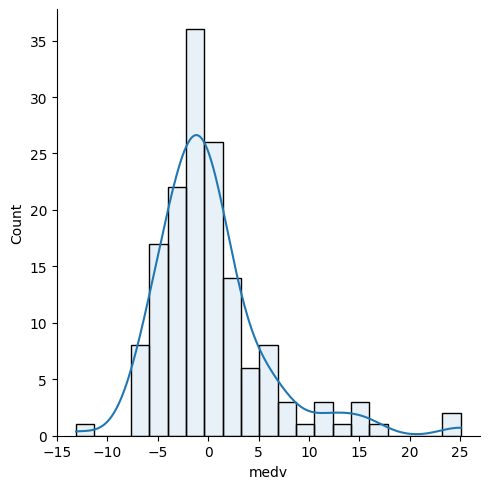

In [11]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
sns.displot(y_test-prediction_lasso , kde = True , alpha = 0.1)


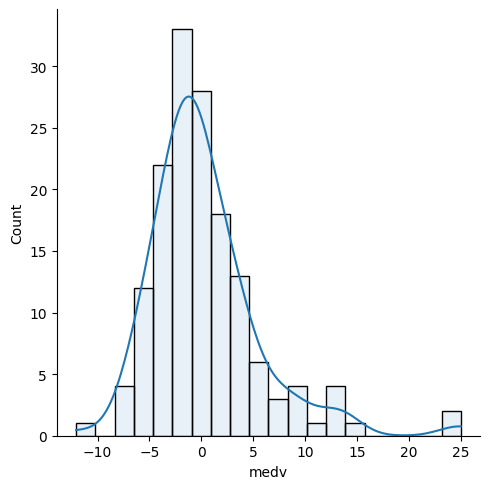

In [12]:
sns.displot(y_test-prediction_ridge , kde = True , alpha = 0.1)

In [17]:
lin_regressor.fit(X_train,y_train)
y_pred = lin_regressor.predict(X_test)
from sklearn.metrics import r2_score
score_Linear_regression = r2_score(y_test , y_pred)
score_Ridge_regression = r2_score(y_test , prediction_ridge)
score_Lasso_regression = r2_score(y_test , prediction_lasso)
print(score_Linear_regression)
print(score_Ridge_regression)
print(score_Lasso_regression)

0.6733825506400166
0.6635202245924474
0.6287082026755156
